In [4]:
import pandas as pd

In [5]:
resumeData = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [6]:
resumeData.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
resumeData.shape

(962, 2)

In [8]:
targetCounts = resumeData['Category'].value_counts()

In [9]:
targetCounts

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Mechanical Engineer          40
Operations Manager           40
ETL Developer                40
Data Science                 40
Sales                        40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
?sns.countplot()

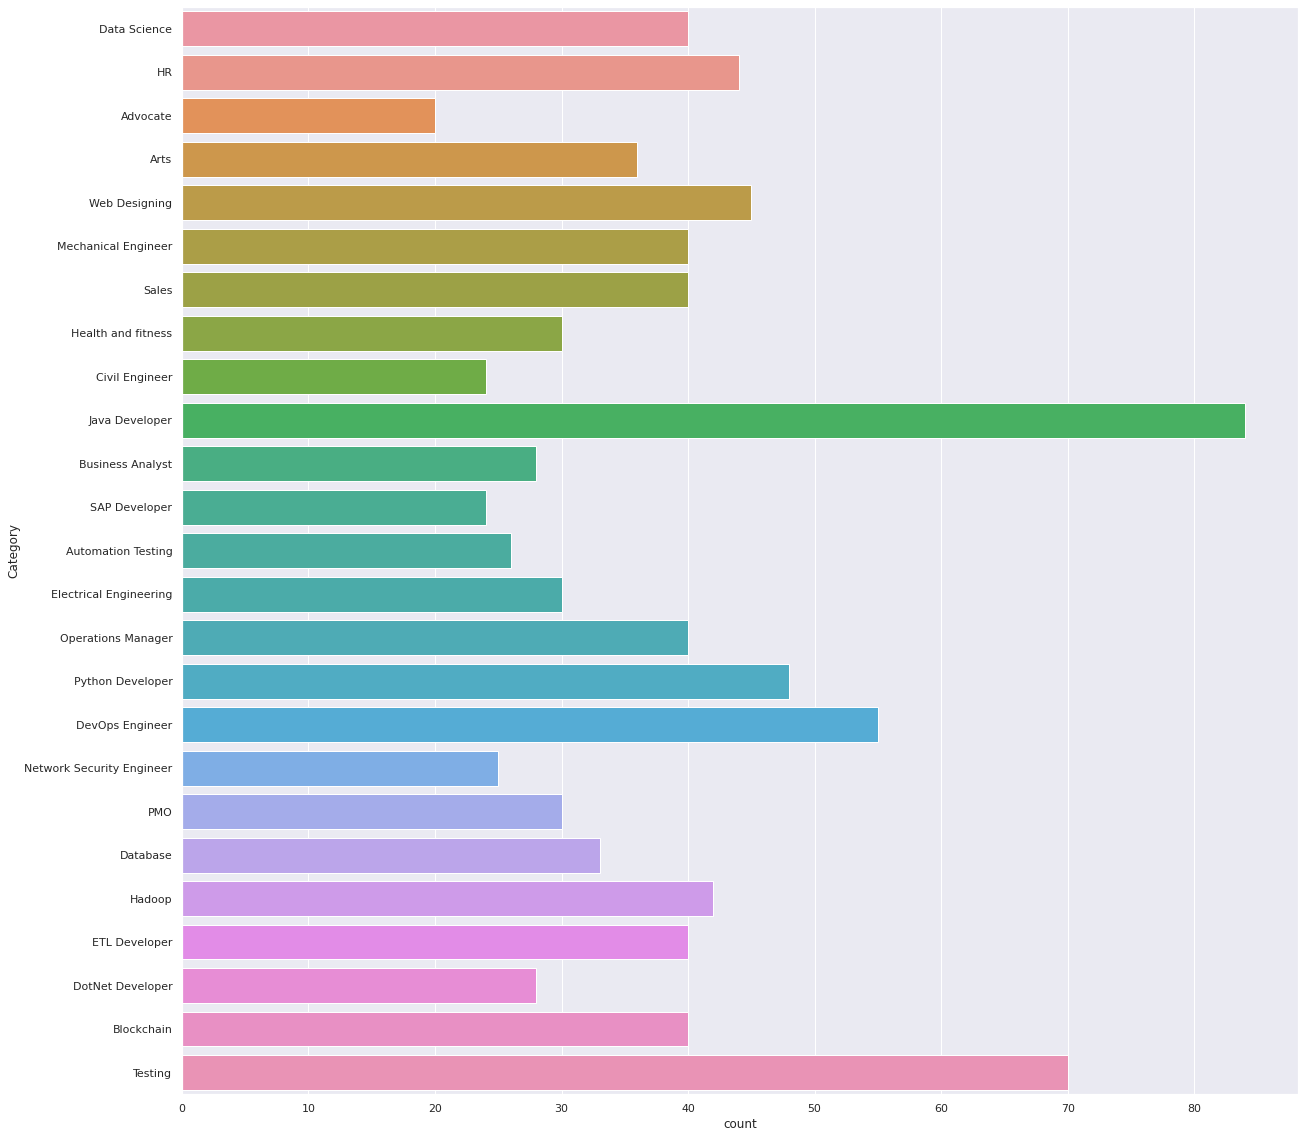

In [12]:
plt.figure(figsize=(20,20))

sns.set_theme(style='darkgrid')
sns.countplot(y="Category", data=resumeData)

In [13]:
targetCounts = targetCounts.to_dict()

In [14]:
targetCounts

{'Advocate': 20,
 'Arts': 36,
 'Automation Testing': 26,
 'Blockchain': 40,
 'Business Analyst': 28,
 'Civil Engineer': 24,
 'Data Science': 40,
 'Database': 33,
 'DevOps Engineer': 55,
 'DotNet Developer': 28,
 'ETL Developer': 40,
 'Electrical Engineering': 30,
 'HR': 44,
 'Hadoop': 42,
 'Health and fitness': 30,
 'Java Developer': 84,
 'Mechanical Engineer': 40,
 'Network Security Engineer': 25,
 'Operations Manager': 40,
 'PMO': 30,
 'Python Developer': 48,
 'SAP Developer': 24,
 'Sales': 40,
 'Testing': 70,
 'Web Designing': 45}

In [15]:
labels = list(targetCounts.keys())
counts = list(targetCounts.values())

In [16]:
print(labels)
print(counts)

['Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer', 'Web Designing', 'HR', 'Hadoop', 'Blockchain', 'Mechanical Engineer', 'Operations Manager', 'ETL Developer', 'Data Science', 'Sales', 'Arts', 'Database', 'PMO', 'Health and fitness', 'Electrical Engineering', 'DotNet Developer', 'Business Analyst', 'Automation Testing', 'Network Security Engineer', 'Civil Engineer', 'SAP Developer', 'Advocate']
[84, 70, 55, 48, 45, 44, 42, 40, 40, 40, 40, 40, 40, 36, 33, 30, 30, 30, 28, 28, 26, 25, 24, 24, 20]


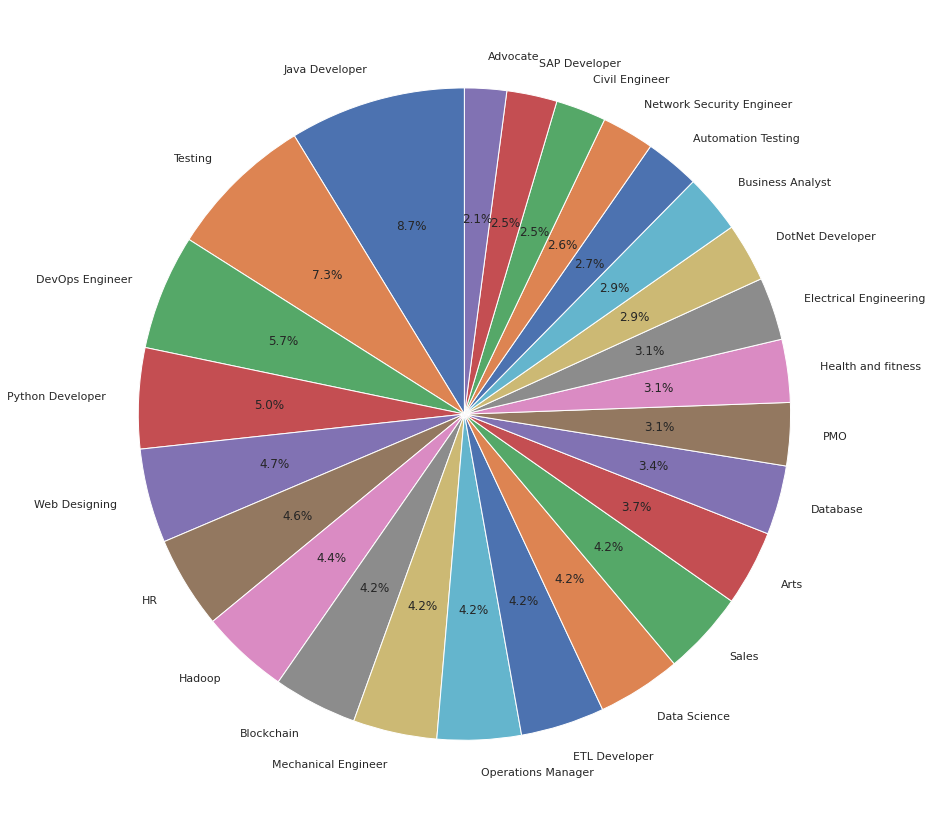

In [17]:
plt.figure(figsize=(15,15))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

In [18]:
import re
def cleanTextData(textData):
  textData = re.sub(r'http\S+', ' ', textData) #removes url.
  textData = re.sub('[^a-zA-Z0-9]', ' ', textData) #removes all special character.
  textData = re.sub('\s+', ' ', textData) #removes extra whitespaces.
  return textData

In [19]:
#resumeData.loc[2]['Resume']

In [20]:
#data = resumeData.loc[2]['Resume']
#print(cleanTextData(data))

In [21]:
resumeData['cleaned_resume'] = resumeData.Resume.apply(lambda x: cleanTextData(x))

In [22]:
resumeData.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [23]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [24]:
combined_all_resume_text = '' 
for resume_text in resumeData.cleaned_resume: #selecting each cleaned resume text
  resume_text = str(resume_text)              #converting to string
  tokens = resume_text.split()                #splitting into tokens
  for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()     
  combined_all_resume_text += " ".join(tokens)+" "  #combining all the text into one string for purpose for creating wordcloud


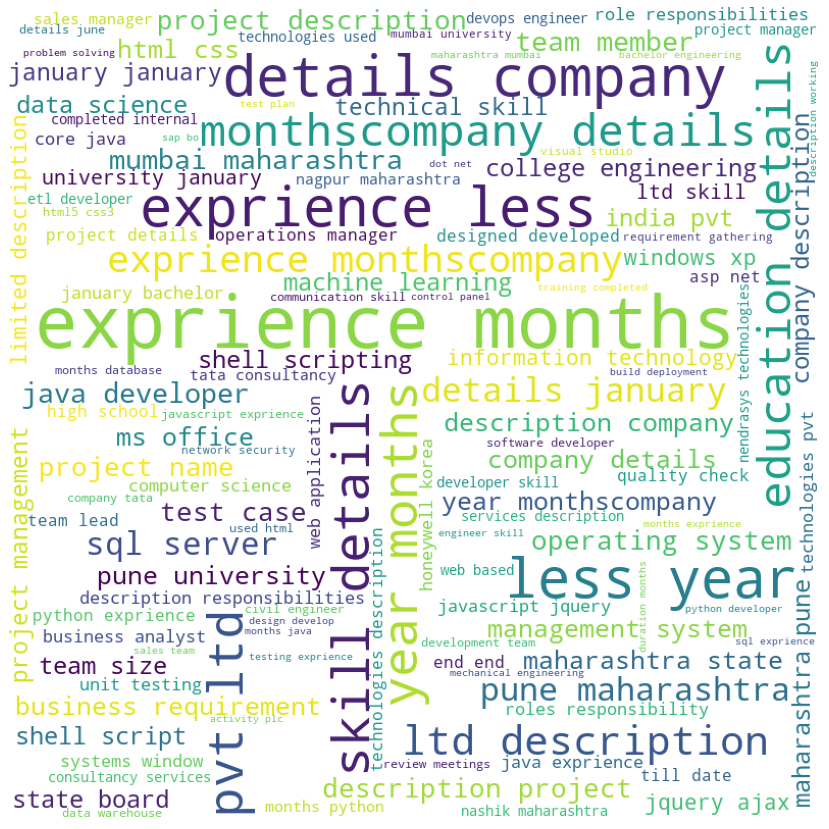

In [25]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(combined_all_resume_text) 
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
plt.show() 

In [26]:
#as we have string(Data science, hr....) categories here, so we cant perform one hot encoding directly as it is available only for numeric category.
#so one way is to do label encoding to give categories numeric value(1,2,...) and then do onehot encoding
#easier way is to use label binarizer that performs both at once.
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() 
resumeData = resumeData.join(pd.DataFrame(lb.fit_transform(resumeData["Category"]),columns=lb.classes_, index=resumeData.index))

In [27]:
text = resumeData['cleaned_resume'].values 
category = resumeData['Category'].values

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1500)
vectorizer.fit(text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1500,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [29]:
features = vectorizer.transform(text)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(features,category,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.98

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      